# Curso: Aprendizaje Automático
# Trabajo Práctico 1

Profesor: Luis Alexánder Calvo Valverde

Instituto Tecnológico de Costa Rica

Programa Ciencia de Datos

---

Fecha de entrega: Lunes 21 de Octubre 2024, a más tardar a las 3:00 pm.

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo jupyter ( .IPYNB ) y el archivo .csv preprocesado.  (En un archivo comprimido)

Estudiante(s):
1. **Agustin Vargas Quesada**



**Indicaciones Generales:**
- Utilice el conjunto de datos proporcionado.
- Prepare un Cuaderno Jupyter  que utilice  celdas de texto y de código.
- Para cada requerimiento que se indica más abajo, debe venir primero una celda de texto en que explica qué va a hacer y por qué elige ese método y una, o más, celdas de código en python que lo realiza.
- Recuerde que puede usar la biblioteca scikit-learn.



**Los requerimientos son:**
1. Cargar los datos y visualizar su contenido, utilice los gráficos y funciones
que considere aportan para entender cómo se comportan las variables.
(10 puntos)
1. El atributo Shucked es ordinal, preprocéselo y justifique su selección. (10
puntos)
1. El atributo Length tiene valores faltantes, realice imputación de datos y
justifique su selección. (10 puntos)
1. El atributo Rings tienen valores atípicos (outliers) proponga cómo corregirlo
y hágalo, justifique su selección. (10 puntos)
1. El atributo Sex es nominal, preprocéselo y justifique su elección. (10 puntos)
1. Analice el comportamiento del atributo Shellweight, y aplíquele una Transformación.
No hay una única forma de hacerlo, para efectos del ejercicio,
seleccione una transformación y diga cómo cambia el comportamiento
del atributo del punto inicial al transformado. (10 puntos)
1. Muestre el histograma de un par de variables, comente lo que le parece relevante
de la graficación. (10 puntos)
1. Muestre el boxplot de un par de variables, comente lo que le parece relevante
de la graficación. (10 puntos)
1. Finalmente, aplique min-max scaling a cada uno de los atributos. (10
puntos)
10. Guarde el nuevo archivo ya procesado, agregándole al nombre del archivo
original el texto «PREPROCESADO» (Ej Abalone-Preprocesado.csv). (10 puntos)

## Importaciones 

En esta seccion se van a realizar las importaciones de las librerias necesarias para realizar la tarea

In [1]:
!pip install tabulate

In [2]:
import pandas as pd
from tabulate import tabulate
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns  # Asegúrate de importar Seaborn


## Parte 1

Primero se va a cargar el archivo abalone.csv y posterior a ver su contenido 

In [35]:
df = pd.read_csv('abalone.csv', delimiter=';')

Para empezar con la exploracion de los datos vamos a usar el siguiente comando para poder observar cuales son las columnas que se encuentran en el dataset.

In [36]:
print(df.columns)

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera',
       'Shellweight', 'Rings'],
      dtype='object')


Como se puede ver hay varias columnas pero no se conoce su contenedo.

In [38]:
print(tabulate(df.head(10), headers='keys', tablefmt='grid'))


+----+-------+----------+------------+----------+---------+-----------+-----------+---------------+---------+
|    | Sex   |   Length |   Diameter |   Height |   Whole | Shucked   |   Viscera |   Shellweight |   Rings |
+====+=======+==========+============+==========+=========+===========+===========+===============+=========+
|  0 | M     |    0.455 |      0.365 |    0.095 |  0.514  | medio     |    0.101  |         0.15  |      15 |
+----+-------+----------+------------+----------+---------+-----------+-----------+---------------+---------+
|  1 | M     |    0.35  |      0.265 |    0.09  |  0.2255 | medio     |    0.0485 |         0.07  |       7 |
+----+-------+----------+------------+----------+---------+-----------+-----------+---------------+---------+
|  2 | F     |    0.53  |      0.42  |    0.135 |  0.677  | medio     |    0.1415 |         0.21  |       9 |
+----+-------+----------+------------+----------+---------+-----------+-----------+---------------+---------+
|  3 | M  

Con lo anterior podemos observar cada columna con su respectivo tipo de dato, la cantidad de datos que posee y si posee algun dato nulo, para esto se utilizo la libreria de tabulate para que la vizualización sea un poco mas clara.
Ahora lo que se va a realizar es un grafico de dispersion para poder observar como se encuentran distribuidos los valores numericos antes de ser pre procesados.

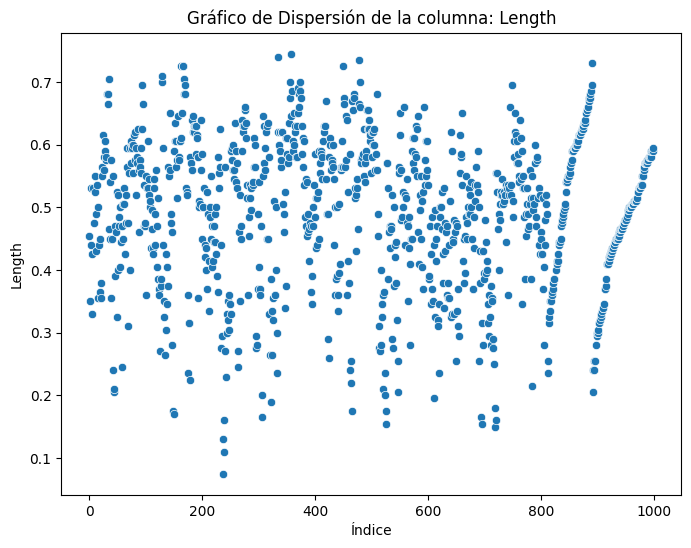

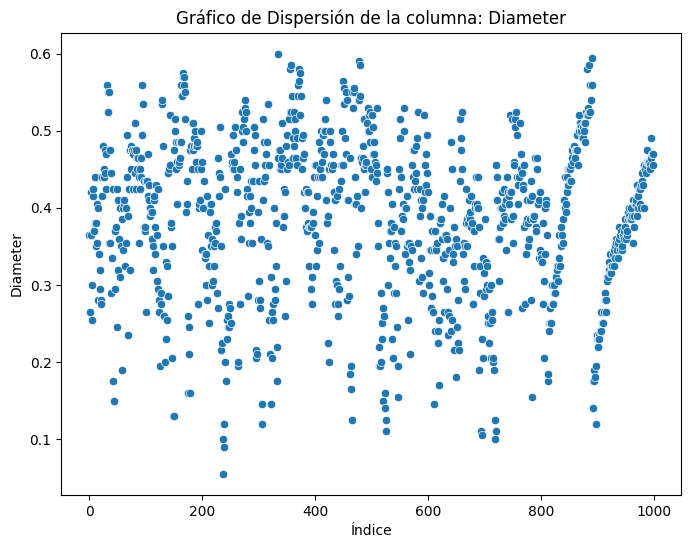

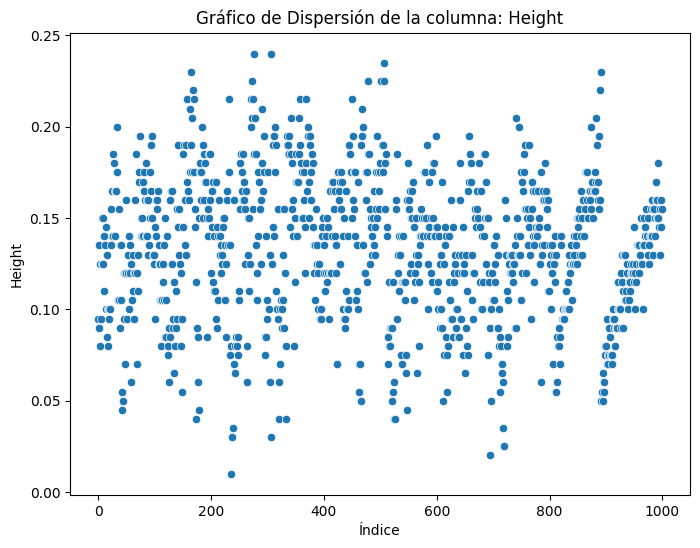

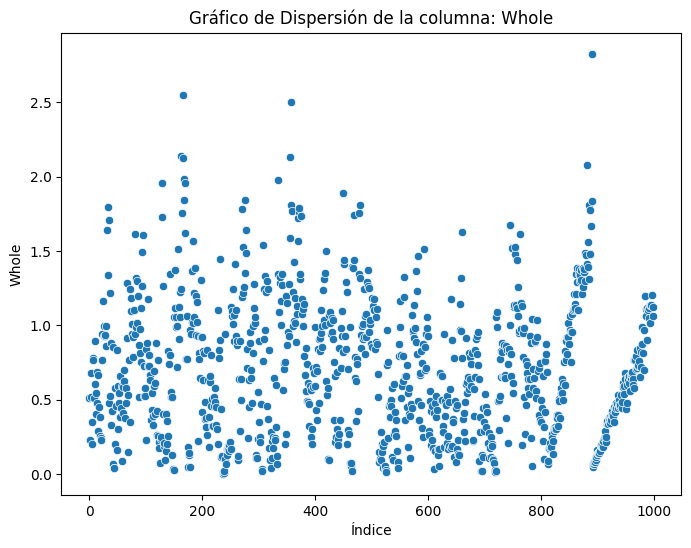

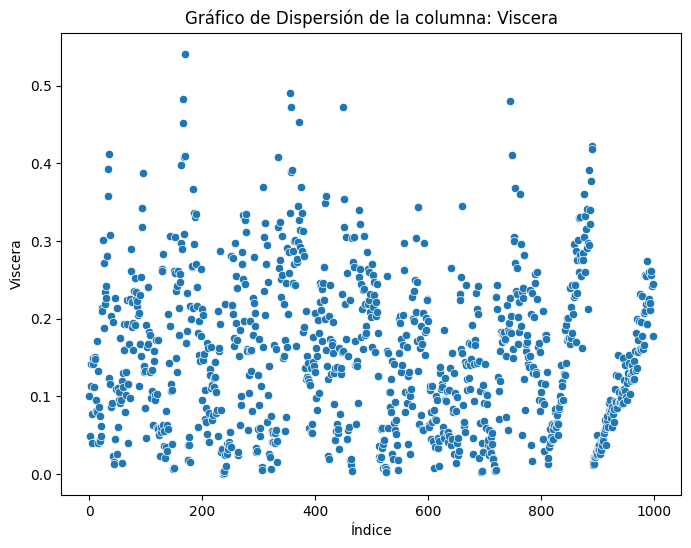

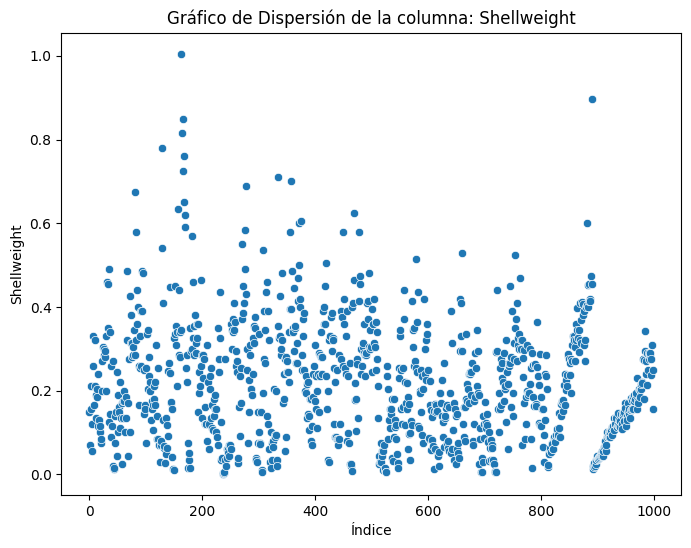

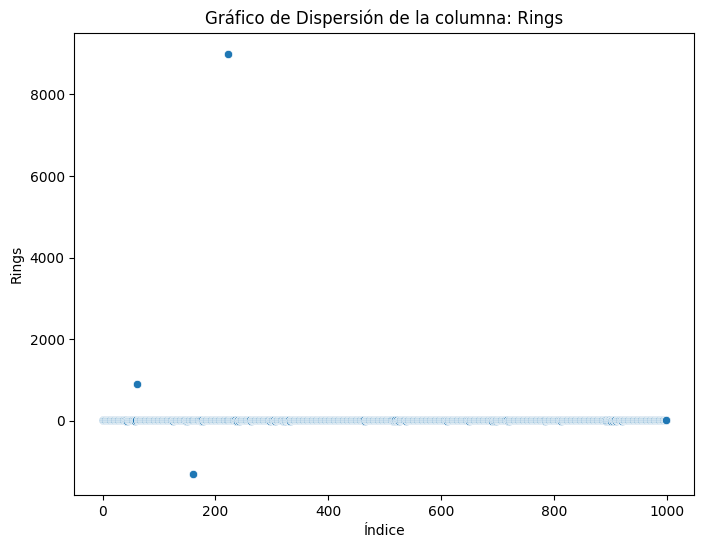

In [39]:
def visualize_scatter_per_column(df):
    # Seleccionar solo columnas numéricas
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    
    # Crear un gráfico de dispersión para cada columna numérica
    for column in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df.index, y=df[column])
        plt.title(f'Gráfico de Dispersión de la columna: {column}')
        plt.xlabel('Índice')
        plt.ylabel(column)
        plt.show()

# Ejemplo de uso
visualize_scatter_per_column(df)

Antes de realizar el pre procesamiento de los datos podemos observar que solo la columna 'Rings' posee datos outliners muy definidos segun lo que podemos observar en los graficos de dispersion, ya que este posee un valor que se separa mucho de los demas.

## Parte 2 
Ahora vamos a trabajar con la columna 'Shucked'

In [40]:
print(df['Shucked'].unique())

['medio' 'pesado' 'muy pesado' 'liviano']


Con lo antrrior podemos ver que esta columna posee 4 valores, los cuales poseen una jerarquia que se puede ordenar de la siguiente forma:
- liviana
- medio
- pesada
- muy pesado

Para este paso se va a realizar un one hot encoding ya que si se utiliza un tipo de jerarquia al final del ejercicio dara un problema que considero que dara un problema, ya que al tener los valores de 0, 1, 2 y 3 este mostrara todos los valores como 0.3333 al realizar un min-max scaling.

In [41]:
# Aplicar One-Hot Encoding a la columna 'Shucked'
df = pd.get_dummies(df, columns=['Shucked'], prefix='Shucked')

# Ver los primeros resultados
print(df.head(10))

  Sex  Length  Diameter  Height   Whole  Viscera  Shellweight  Rings  \
0   M   0.455     0.365   0.095  0.5140   0.1010        0.150     15   
1   M   0.350     0.265   0.090  0.2255   0.0485        0.070      7   
2   F   0.530     0.420   0.135  0.6770   0.1415        0.210      9   
3   M   0.440     0.365   0.125  0.5160   0.1140        0.155     10   
4   I   0.330     0.255   0.080  0.2050   0.0395        0.055      7   
5   I   0.425     0.300   0.095  0.3515   0.0775        0.120      8   
6   F   0.530     0.415   0.150  0.7775   0.1415        0.330     20   
7   F     NaN     0.425   0.125  0.7680   0.1495        0.260     16   
8   M   0.475     0.370   0.125  0.5095   0.1125        0.165      9   
9   F   0.550     0.440   0.150  0.8945   0.1510        0.320     19   

   Shucked_liviano  Shucked_medio  Shucked_muy pesado  Shucked_pesado  
0            False           True               False           False  
1            False           True               False          

## Parte 3
Ahora vamos a trabajar con los datos faltantes de la columna 'Lenght', primero vamos a ver cuantos valores faltabtes hay en nuestra columna con un metodo igual al que usamos al inicio del cuaderno de la siguiente manera:

In [42]:
print(df['Length'].isnull().sum())

13


Podemos obersrvar que tenemos 13 valores vacios en esta columna para esto vamos a utilizar el metodo de la imputacion de valores faltantes, se va a utilizar este metodo ya que si bien se eliminan los demas valores esto nos puede afectar para otras columnas ya que no solo estamos eliminando los valores faltantes si no que estamos eliminando toda la fila. 

In [44]:
df.fillna(df['Length'].mean(), inplace=True)

print(df['Length'].isnull().sum())

0


Ahora en la columna 'Length' en los valores faltantes poseemos la media.

## Parte 4
En esta parte vamos a trabajar sobre los valores atipicos de la columna ring, para esto como vimos al inicio del cuaderno vamos a usar un boxplot para observar los valores outliners de la columna 'Ring'

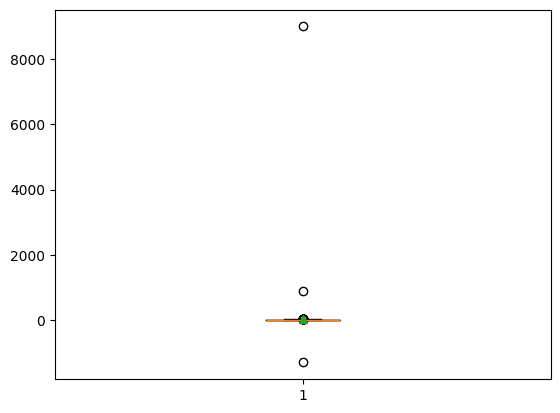

In [45]:
pyplot.boxplot(df['Rings'], showmeans=True)
pyplot.show()

Para encontrar los outliers se va a utilizar el metodo de IQR que es el rango intercuartilico el cual este consiste en que cualquier punto que quede fuera o con 1.5 veces por debajo el primer cuartil o 1.5 veces por encima del tercer cuartil son considerados valores outliers, de esta manera el analisis quedara de la siguiente manera:

In [46]:
# Definir los cuartiles y el rango intercuartílico (IQR)
Q1 = df['Rings'].quantile(0.25)
Q3 = df['Rings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar los outliers
outliers = df[(df['Rings'] < lower_bound) | (df['Rings'] > upper_bound)]
print(f"Número de outliers identificados: {len(outliers)}")

Número de outliers identificados: 25


In [47]:
# Identificar los índices de valores normales (no outliers)
normal_indices = df[(df['Rings'] >= lower_bound) & (df['Rings'] <= upper_bound)].index

# Identificar los índices de los outliers
outlier_indices = outliers.index

# Generar valores aleatorios del rango normal para reemplazar los outliers
random_values = df.loc[normal_indices, 'Rings'].sample(n=len(outlier_indices), replace=True).values

# Reemplazar los outliers con los valores aleatorios directamente en el DataFrame original
df.loc[outlier_indices, 'Rings'] = random_values

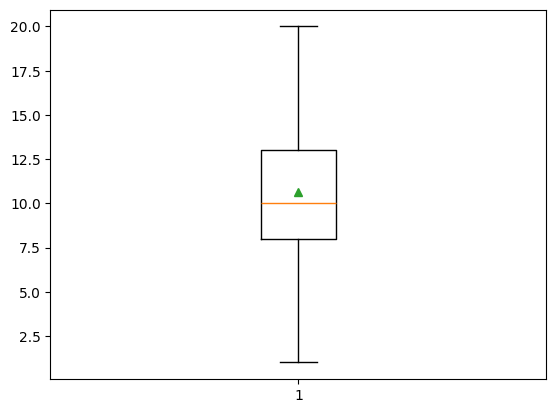

In [48]:
pyplot.boxplot(df['Rings'], showmeans=True)
pyplot.show()

Con lo anterior realizado se se tomo la decisión de sustituir los outliers con valores que ya estan dentro del conjunto de datos, esto para no tener que usar una constante de un valor que no sabemos si es correcto, entonces mejor se utlizaron valores que ya estan dentro del mismo conjunto de datos y que pueda haber variabilidad.

## Parte 5

Para esta parte vamos a relizar una transformacion para la columna 'Sex', lo cual vamos a ver cuales son los valores haciendo uso de la siguiente linea de codigo.

In [49]:
print(df['Sex'].unique())

['M' 'F' 'I']


Se puede observar que hay tres categorias, para esto se va a utilizar el dummy encoding ya que los atributos de la columna 'Sex' son una categoria la cual solo puede ser uno u otra, no deberia de estar involucrada la jerarquia del one hot encoding

In [50]:
# Convertir la columna 'Sex' en variables dummy
df = pd.get_dummies(df, columns=['Sex'], prefix='Sex')

In [51]:
# Mostrar las primeras filas para verificar el resultado
print(df)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings  \
0     0.455     0.365   0.095  0.5140   0.1010        0.150     15   
1     0.350     0.265   0.090  0.2255   0.0485        0.070      7   
2     0.530     0.420   0.135  0.6770   0.1415        0.210      9   
3     0.440     0.365   0.125  0.5160   0.1140        0.155     10   
4     0.330     0.255   0.080  0.2050   0.0395        0.055      7   
..      ...       ...     ...     ...      ...          ...    ...   
995   0.580     0.490   0.130  1.1335   0.2565        0.237      9   
996   0.590     0.465   0.155  1.1360   0.2615        0.275     11   
997   0.590     0.470   0.160  1.2060   0.2425        0.309      8   
998   0.590     0.455   0.145  1.0630   0.2445        0.250      8   
999   0.595     0.470   0.155  1.1210   0.1780        0.155     11   

     Shucked_liviano  Shucked_medio  Shucked_muy pesado  Shucked_pesado  \
0              False           True               False           False   
1        

## Parte 6

Ahora vamos a ver el comportamiento de la columna 'Shellweight

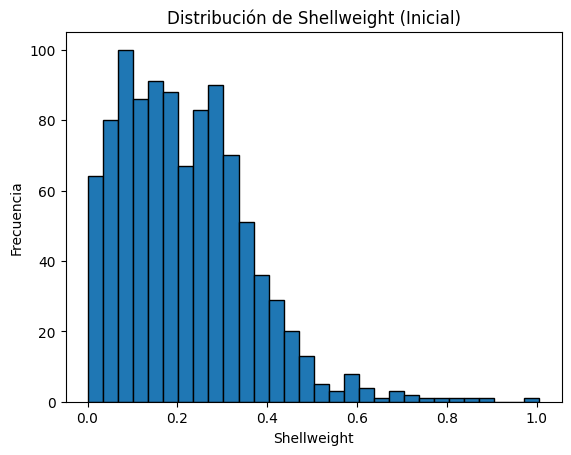

In [52]:
# Histograma para visualizar la distribución inicial
plt.hist(df['Shellweight'], bins=30, edgecolor='k')
plt.title('Distribución de Shellweight (Inicial)')
plt.xlabel('Shellweight')
plt.ylabel('Frecuencia')
plt.show()

In [53]:
# Aplicar la transformación raíz cuadrada
df['Shellweight_sqrt'] = np.sqrt(df['Shellweight'])

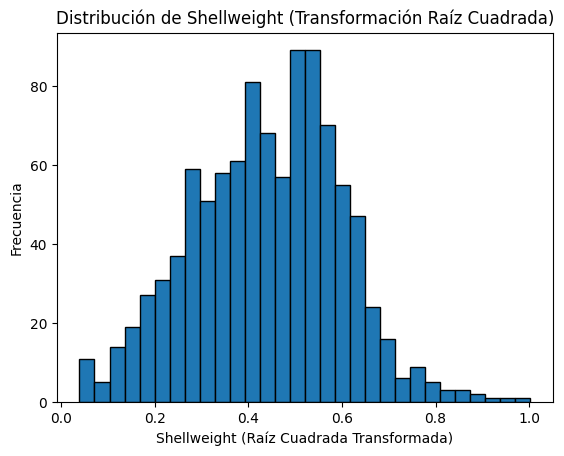

In [54]:
# Graficar el resultado
plt.hist(df['Shellweight_sqrt'], bins=30, edgecolor='k')
plt.title('Distribución de Shellweight (Transformación Raíz Cuadrada)')
plt.xlabel('Shellweight (Raíz Cuadrada Transformada)')
plt.ylabel('Frecuencia')
plt.show()


Con los pasos que se realizaron anteriormente podemos observar que el conjunto de datos posee un sesgo a la izquierda, esto quiere decir que la mayoria de datos se encuentran en esta parte, para transformar los datos se utilizo una transformacion de raíz cuadrada la cual nos permite poder distribuir mejor los datos de forma simetrica que no esten todos agrupados hacia la izquierda si no que nos permita que todos los datos tengan mas simetria.

## Parte 7

Ahora se va a seleccionar dos variables para analizarlas por medio de un histograma.

In [55]:
print(df)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings  \
0     0.455     0.365   0.095  0.5140   0.1010        0.150     15   
1     0.350     0.265   0.090  0.2255   0.0485        0.070      7   
2     0.530     0.420   0.135  0.6770   0.1415        0.210      9   
3     0.440     0.365   0.125  0.5160   0.1140        0.155     10   
4     0.330     0.255   0.080  0.2050   0.0395        0.055      7   
..      ...       ...     ...     ...      ...          ...    ...   
995   0.580     0.490   0.130  1.1335   0.2565        0.237      9   
996   0.590     0.465   0.155  1.1360   0.2615        0.275     11   
997   0.590     0.470   0.160  1.2060   0.2425        0.309      8   
998   0.590     0.455   0.145  1.0630   0.2445        0.250      8   
999   0.595     0.470   0.155  1.1210   0.1780        0.155     11   

     Shucked_liviano  Shucked_medio  Shucked_muy pesado  Shucked_pesado  \
0              False           True               False           False   
1        

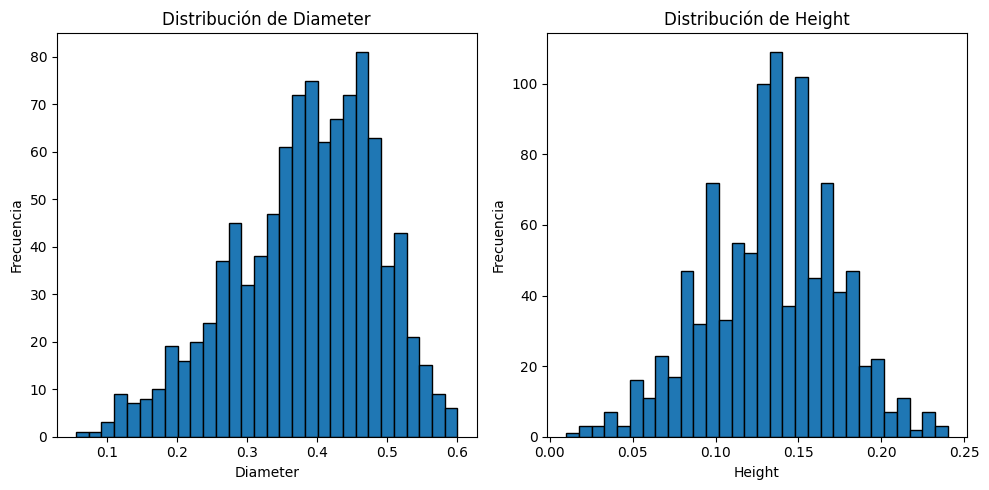

In [56]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(df['Diameter'], bins=30, edgecolor='k')
plt.title('Distribución de Diameter')
plt.xlabel('Diameter')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['Height'], bins=30, edgecolor='k')
plt.title('Distribución de Height')
plt.xlabel('Height')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


Se selecciono los valores de Diameter y Height los cuales se podria decir que el valor de Diameter posee una forma simetrica ya que todos los valores se encuentran distribuidos de una forma en la que no esta ni muy hacia la izquierda ni muy hacia la derecha si no que la mayoria esta centrada como entre 0.3 y 0.5 mientras que en el valor Height se puede decir que no es muy simetrico ya que hay valores muy altos cerca de 0.13 y cerca de 0.16 y los datos no estan tan distribuidos de manera uniforme como estan en Diameter.

## Parte 8

Ahora se realizaran unos boxplot para realizar una comparación

In [57]:
print(df)

     Length  Diameter  Height   Whole  Viscera  Shellweight  Rings  \
0     0.455     0.365   0.095  0.5140   0.1010        0.150     15   
1     0.350     0.265   0.090  0.2255   0.0485        0.070      7   
2     0.530     0.420   0.135  0.6770   0.1415        0.210      9   
3     0.440     0.365   0.125  0.5160   0.1140        0.155     10   
4     0.330     0.255   0.080  0.2050   0.0395        0.055      7   
..      ...       ...     ...     ...      ...          ...    ...   
995   0.580     0.490   0.130  1.1335   0.2565        0.237      9   
996   0.590     0.465   0.155  1.1360   0.2615        0.275     11   
997   0.590     0.470   0.160  1.2060   0.2425        0.309      8   
998   0.590     0.455   0.145  1.0630   0.2445        0.250      8   
999   0.595     0.470   0.155  1.1210   0.1780        0.155     11   

     Shucked_liviano  Shucked_medio  Shucked_muy pesado  Shucked_pesado  \
0              False           True               False           False   
1        

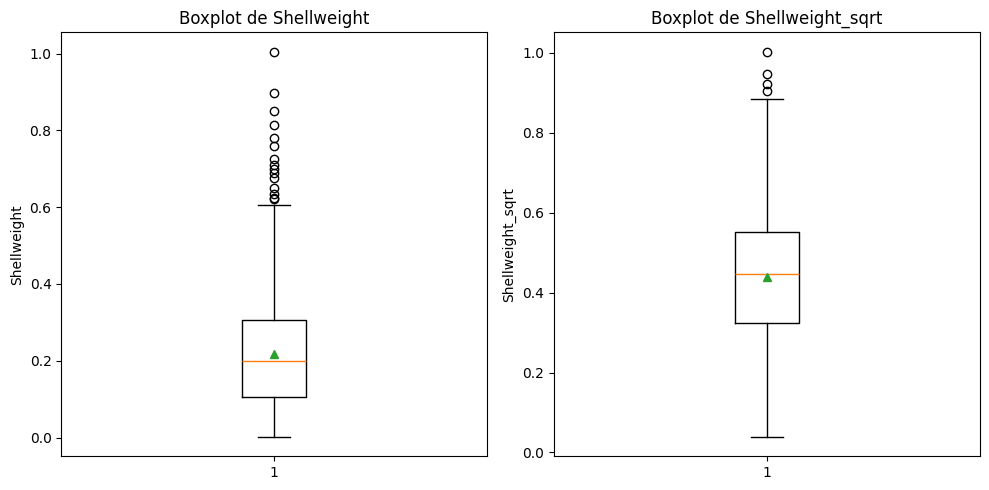

In [58]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1) 
plt.boxplot(df['Shellweight'], showmeans=True)
plt.title('Boxplot de Shellweight')
plt.ylabel('Shellweight')

plt.subplot(1, 2, 2)
plt.boxplot(df['Shellweight_sqrt'], showmeans=True)
plt.title('Boxplot de Shellweight_sqrt')
plt.ylabel('Shellweight_sqrt')

plt.tight_layout()
plt.show()

Se estan comparando las columnas Shellweight la cual no tiene ningun tipo de transformacion y la columna Shellweight_sqrt la cual se le hizo una transformacion de raiz cuadrada y podemos ver que antes de la transformacion poseia muchos outliers y al concentracion de datos esta apartir del tercer cuartil, mientras que cuando se realiza la transformacion de raiz cuadrada los datos esten un poco mas agrupados reduciendo la varianza de estos, de igual forma se puede ver que existen datos outliers pero en este caso son menos.

## Parte 9

Para esta parte se va a realizar el min-max scaling el cual nos va a permiter normalizar los valores de cada atributo en un rango de entre 0 y 1

In [59]:
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print(df_scaled.head(20))


      Length  Diameter    Height     Whole   Viscera  Shellweight     Rings  \
0   0.567164  0.568807  0.369565  0.181335  0.185939     0.147982  0.736842   
1   0.410448  0.385321  0.347826  0.079157  0.088807     0.068261  0.315789   
2   0.679104  0.669725  0.543478  0.239065  0.260870     0.207773  0.421053   
3   0.544776  0.568807  0.500000  0.182044  0.209991     0.152965  0.473684   
4   0.380597  0.366972  0.304348  0.071897  0.072155     0.053313  0.315789   
5   0.522388  0.449541  0.369565  0.123783  0.142461     0.118087  0.368421   
6   0.679104  0.660550  0.608696  0.274659  0.260870     0.327354  1.000000   
7   0.618851  0.678899  0.500000  0.271294  0.275671     0.257598  0.789474   
8   0.597015  0.577982  0.500000  0.179741  0.207216     0.162930  0.421053   
9   0.708955  0.706422  0.608696  0.316097  0.278446     0.317389  0.947368   
10  0.671642  0.596330  0.565217  0.214096  0.271970     0.207773  0.684211   
11  0.529851  0.541284  0.434783  0.143085  0.148936

## Parte 10

Ahora se va a guardar el archivo ya procesado en un nuevo archivo llamado abalone-PROCESADO.csv

In [60]:
original_filename = 'abalone.csv'

new_filename = original_filename.replace('.csv', '-PREPROCESADO.csv')

df.to_csv(new_filename, index=False)

print(f"Archivo guardado como: {new_filename}")


Archivo guardado como: abalone-PREPROCESADO.csv
